In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('C:/Python Data/titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
cat_cols=df.select_dtypes(include="object").columns
print(cat_cols)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [6]:
num_cols=df.select_dtypes(include="int64").columns
print(num_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')


In [7]:
df[cat_cols].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [8]:
df.shape

(891, 12)

In [9]:
df['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [10]:
df1= df.drop(columns=['Name','Ticket'])
df1.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
df.shape

(891, 12)

In [12]:
df1.shape

(891, 10)

In [13]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df1.isnull().sum()/df1.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [15]:
(df1.isnull().sum()/df1.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [16]:
var=round((df1.isnull().sum()/df1.shape[0])*100,2)

In [17]:
for i in var:
    print(i,"%")


0.0 %
0.0 %
0.0 %
0.0 %
19.87 %
0.0 %
0.0 %
0.0 %
77.1 %
0.22 %


In [18]:
df2=df1.drop(columns='Cabin')



df2.head()

In [19]:
df2.shape

(891, 9)

In [20]:
# Mean imputation
df3 = df2.fillna(df2.Age.mean())
# Let's check the null values again



In [21]:
df3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [22]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df1.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:

df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [25]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Keyring is skipped due to an exception: 'keyring.backends'


In [26]:
import matplotlib.pyplot as plt



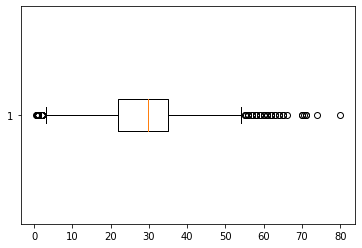

In [27]:
plt.boxplot(df3['Age'],vert=False)
plt.show()

In [28]:
mean=df3['Age'].mean()
print(mean)

29.699117647058763


In [29]:
std=df3['Age'].std()
print(std)

13.002015226002884


In [30]:
lower_bound=mean-std**2
print(lower_bound)


-139.35328229015207


In [31]:
upper_bound=mean+std**2
print(upper_bound)

198.75151758426958


In [32]:
df4=df3[(df3['Age']>=lower_bound) & (df3['Age']<=upper_bound)]
df4.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#Calculate survival rates by gender
survival_by_gender=df.groupby('Sex')['Survived'].mean()



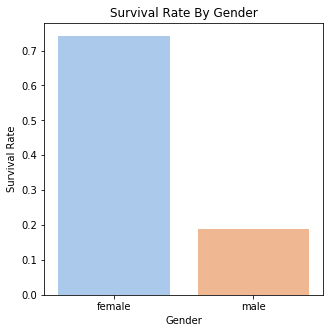

In [35]:
plt.figure(figsize=(5,5))
sns.barplot(x=survival_by_gender.index,y=survival_by_gender.values,palette='pastel')
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rate By Gender")
plt.show()

In [36]:
#Calculate survival rates by gender
survival_by_gender=df.groupby('Sex')['Survived'].mean()


In [37]:
print(survival_by_gender)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


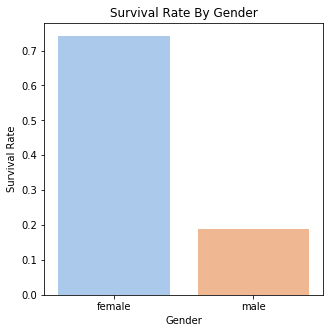

In [38]:
plt.figure(figsize=(5,5))
sns.barplot(x=survival_by_gender.index,y=survival_by_gender.values,palette='pastel')
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rate By Gender")
plt.show()

In [39]:
# Survival rate as per Gender & Class

survival_by_gender_class=df.groupby(['Sex','Pclass'])['Survived'].mean().unstack()

<Figure size 360x360 with 0 Axes>

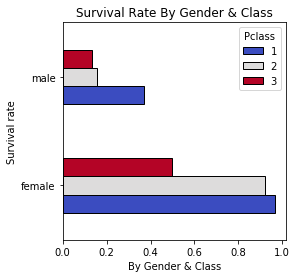

In [40]:
plt.figure(figsize=(5,5))
survival_by_gender_class.plot(kind='barh',figsize=(4,4),colormap="coolwarm",edgecolor="black")
plt.xlabel('By Gender & Class')
plt.ylabel('Survival rate')
plt.title("Survival Rate By Gender & Class")


plt.show()

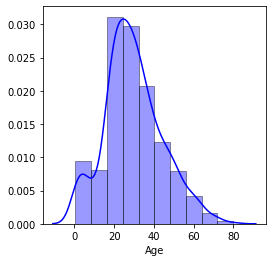

In [41]:
# Age distribution

plt.figure(figsize=(4,4))
sns.distplot(df['Age'],bins=10,kde=True,color="blue",hist_kws={'edgecolor': 'black'})
plt.show()

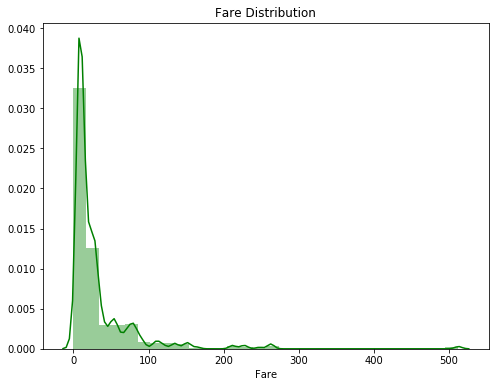

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the plot
plt.figure(figsize=(8, 6))
sns.distplot(df['Fare'], kde=True, color='green', bins=30)
# Title and display the plot
plt.title('Fare Distribution')
plt.show()


In [43]:
corr=df.corr()

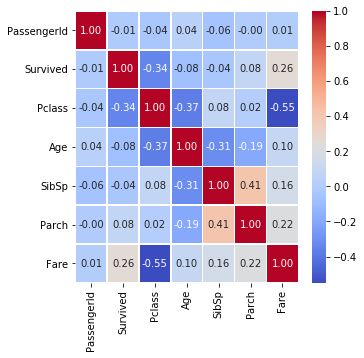

In [44]:
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [45]:
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler=MinMaxScaler(feature_range=(0,1))

num_cols=[col for col in X.columns if X[col].dtype!='object']
x1=X
print(num_cols)

x1[num_cols]=scaler.fit_transform(x1[num_cols])
x1.head(50)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


C:\Users\leno\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.000000,0.014151,S
1,0.0,female,0.472229,0.125,0.000000,0.139136,C
2,1.0,female,0.321438,0.000,0.000000,0.015469,S
3,0.0,female,0.434531,0.125,0.000000,0.103644,S
4,1.0,male,0.434531,0.000,0.000000,0.015713,S
5,1.0,male,0.367921,0.000,0.000000,0.016510,Q
6,0.0,male,0.673285,0.000,0.000000,0.101229,S
7,1.0,male,0.019854,0.375,0.166667,0.041136,S
8,1.0,female,0.334004,0.000,0.333333,0.021731,S
9,0.5,female,0.170646,0.125,0.000000,0.058694,C


In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))

num_cols=[col for col in X.columns if X[col].dtype!="object"]

In [49]:
x1=X
x1[num_cols]=scaler.fit_transform(x1[num_cols])
x1.head()

C:\Users\leno\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


In [50]:
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']


In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
num_col_=[col for col in X.columns if X[col].dtype!="object"]
print(num_col_)
x1=X

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [61]:
# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']

x1 = X
x1.head()
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()
print(x1)


     Pclass     Sex       Age  SibSp     Parch      Fare Embarked
0       1.0    male  0.271174  0.125  0.000000  0.014151        S
1       0.0  female  0.472229  0.125  0.000000  0.139136        C
2       1.0  female  0.321438  0.000  0.000000  0.015469        S
3       0.0  female  0.434531  0.125  0.000000  0.103644        S
4       1.0    male  0.434531  0.000  0.000000  0.015713        S
..      ...     ...       ...    ...       ...       ...      ...
886     0.5    male  0.334004  0.000  0.000000  0.025374        S
887     0.0  female  0.233476  0.000  0.000000  0.058556        S
888     1.0  female  0.367921  0.125  0.333333  0.045771        S
889     0.0    male  0.321438  0.000  0.000000  0.058556        C
890     1.0    male  0.396833  0.000  0.000000  0.015127        Q

[891 rows x 7 columns]


C:\Users\leno\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
